In [1]:
!pip install  -q -U langgraph langchain_core langchain_google_genai requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 437.9/437.9 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 11.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.18 which is incompatible.


In [2]:
from google.colab import userdata
GEMINI_API_KEY = userdata.get("GOOGLE_API_KEY")

In [3]:
# Creating LLM INSTANCE
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(
    api_key = GEMINI_API_KEY,
    model = "gemini-2.0-flash",
)

In [31]:
# creating tools
import requests
def tell_me_joke():
  """Retrieve A joke from an API
  and Then Return it
  """
  res = requests.get("https://sv443.net/jokeapi/v2/joke/Any").json()
  if "joke" in res:
    return res["joke"]
  else:
    return res["setup"] +  res["delivery"]
tell_me_joke()
llm_with_tools = llm.bind_tools([tell_me_joke])

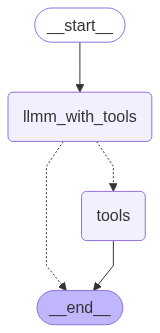

In [65]:
from langgraph.graph import StateGraph,END,START, add_messages,MessagesState
from langchain_core.messages import HumanMessage
from langchain_core.messages import AnyMessage
from langgraph.prebuilt import  tools_condition,ToolNode
from typing import TypedDict, Annotated
class MessagesState(TypedDict):
  messages: Annotated[list[AnyMessage],add_messages]
def llmm_with_tools(state:MessagesState):
  return {"messages":llm_with_tools.invoke(state["messages"])}
builder = StateGraph(MessagesState)
builder.add_node("llmm_with_tools",llmm_with_tools)
builder.add_node("tools",ToolNode([tell_me_joke]))
builder.add_edge(START,"llmm_with_tools")
builder.add_conditional_edges("llmm_with_tools", tools_condition)
builder.add_edge("tools",END)
graph = builder.compile()
from IPython.display import display,Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [67]:
messages = graph.invoke({"messages":HumanMessage(content="who is Khan")})
from pprint import pprint
for m in messages["messages"]:
  m.pretty_print()

================================ Human Message =================================

who is Khan
================================== Ai Message ==================================

I am sorry, I cannot provide information about who Khan is. I can tell you a joke if you want.


In [68]:
!pip install langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.9/62.9 kB 1.2 MB/s eta 0:00:00


In [77]:
from langchain_google_genai import ChatGoogleGenerativeAI
from google.colab import userdata

llm = ChatGoogleGenerativeAI(
    api_key=GEMINI_API_KEY,
    model="gemini-2.0-flash"
)
message = llm.invoke([HumanMessage(content="who is Khan")])
message.pretty_print()

================================== Ai Message ==================================

"Khan" is a title of Mongol origin, meaning "ruler" or "leader." It's a common surname and title in many parts of Asia and the Middle East. Therefore, there isn't one single "Khan." Here's a breakdown of what you might be referring to:

*   **Genghis Khan (Temüjin):** Perhaps the most famous Khan, he was the founder and Great Khan (Emperor) of the Mongol Empire, which became the largest contiguous empire in history after his death.

*   **Kublai Khan:** Grandson of Genghis Khan and founder of the Yuan dynasty in China.

*   **Other historical Khans:** Many other rulers and leaders throughout history have used the title "Khan," particularly in Central Asia, Persia, and India.

*   **As a surname:** "Khan" is a very common surname, especially in South Asia (Pakistan, India, Bangladesh), Afghanistan, and other parts of Asia and the Middle East. People with the surname "Khan" are often, but not always, descen

In [78]:
def multiply(a:int,b:int) -> int:
  """Mutiply a and b
  Args:
       a : first int
       b: second int
  return a *b
  """
  return a*b
llm_with_tools = llm.bind_tools([multiply])
message = llm_with_tools.invoke([HumanMessage(content="what is 2 multiply 2")])
message

AIMessage(content='', additional_kwargs={'function_call': {'name': 'multiply', 'arguments': '{"a": 2.0, "b": 2.0}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--1fdc151b-3976-4502-927c-f9cb3c5f27c6-0', tool_calls=[{'name': 'multiply', 'args': {'a': 2.0, 'b': 2.0}, 'id': '9ad8e1eb-22c8-4466-9bc6-854f5e8447a7', 'type': 'tool_call'}], usage_metadata={'input_tokens': 41, 'output_tokens': 5, 'total_tokens': 46, 'input_token_details': {'cache_read': 0}})

In [79]:
# let make state
from langgraph.graph.message import MessagesState
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages
from typing import TypedDict, Annotated
class MessagesState(TypedDict):
  messages:Annotated[list[AnyMessage],add_messages]

In [80]:
# let make a node
def llm_calling_tools(state:MessagesState):
  return {"messages":[llm_with_tools.invoke(state["messages"])]}

In [97]:
from langgraph.graph import StateGraph,END,START
from langchain_core.messages import HumanMessage
from langchain_core.messages import AnyMessage
from langgraph.prebuilt import  tools_condition,ToolNode
builder = StateGraph(MessagesState)
builder.add_node("llm_calling_tools",llm_calling_tools)
builder.add_node("tools",ToolNode([multiply]))
builder.add_edge(START,"llm_calling_tools")
builder.add_conditional_edges("llm_calling_tools",
#If the latest message (result) from assistant is a tool call tools condition coutes to tools
#If the latest message (result) from assistant is a not a tool call tools condition routes to END
                              tools_condition,)
builder.add_edge("tools",END)
graph = builder.compile()

In [98]:
m = graph.invoke({"messages":[HumanMessage(content="What is 2 * 2")]})
from pprint import pprint
for message in m["messages"]:
  message.pretty_print()

================================ Human Message =================================

What is 2 * 2
================================== Ai Message ==================================
Tool Calls:
  multiply (601dea42-72b8-491d-9058-571697bf2434)
 Call ID: 601dea42-72b8-491d-9058-571697bf2434
  Args:
    a: 2.0
    b: 2.0
================================= Tool Message =================================
Name: multiply

4


In [101]:
m = graph.invoke({"messages":[HumanMessage(content="Hello world")]})
from pprint import pprint
for message in m["messages"]:
  message.pretty_print()

================================ Human Message =================================

Hello world
================================== Ai Message ==================================

Hello! How can I help you today?
